# Fintech Project

## Enviroment initialization

### Drive mount

In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/Fintech/Business Case 1/

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/Fintech/Business Case 1


### Import libraries

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN

In [ ]:
# Install additional packages
#!pip install umap
import umap
#!pip install umap-learn
import umap.umap_ as umap
#!pip install hdbscan
import hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 13.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039286 sha256=488b7025089b66f565ba44cd76cd70f1cb8be24225f2152980ed9c81965397bf
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.8
    Uninstalling Cython-3.0.8:
      Successfully uninstalled Cython-3.0.8


## Import and preprocess data

In [ ]:
excel_file_path = 'BankClients.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(excel_file_path)

# Now 'df' contains your data from the Excel file
print(df.head())  # Display the first few rows of the DataFrame

# Drop the 'ID' column
df.drop(columns=['ID'], inplace=True)

print(df.head())  # Display the first few rows of the modified DataFrame

   ID  Age  Gender  Job  Area  CitySize  FamilySize    Income    Wealth  \
0   1   24       1    1     2         2           4  0.668046  0.702786   
1   2   47       1    2     2         3           1  0.858453  0.915043   
2   3   38       0    2     1         2           2  0.926818  0.898316   
3   4   67       0    2     1         2           3  0.538797  0.423180   
4   5   33       0    2     1         3           1  0.806659  0.731404   

       Debt    FinEdu       ESG   Digital  BankFriend  LifeStyle    Luxury  \
0  0.262070  0.741853  0.483684  0.698625    0.618259   0.607877  0.897369   
1  0.730430  0.859423  0.537167  0.959025    0.785936   0.862271  0.913729   
2  0.441272  0.485953  0.649434  0.750265    0.699725   0.755404  0.765199   
3  0.600401  0.493144  0.533829  0.590165    0.675353   0.334432  0.517209   
4  0.831449  0.856286  0.784940  0.710026    0.758793   0.908878  0.611610   

     Saving  Investments  
0  0.283222            1  
1  0.821590            3  

In [ ]:
df.shape

(5000, 17)

In [ ]:
df.columns

Index(['Age', 'Gender', 'Job', 'Area', 'CitySize', 'FamilySize', 'Income',
       'Wealth', 'Debt', 'FinEdu', 'ESG', 'Digital', 'BankFriend', 'LifeStyle',
       'Luxury', 'Saving', 'Investments'],
      dtype='object')

In [ ]:
duplicate_count = df.duplicated().sum()
print(duplicate_count)

0


In [ ]:
# print(df.dtypes) ---> No categorical feats
categorical_cols = ['Gender', 'Job', 'Area', 'CitySize', 'Investments']
df_encoded = pd.get_dummies(df, columns=categorical_cols)
df_encoded.info()
df = df_encoded

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            5000 non-null   int64  
 1   FamilySize     5000 non-null   int64  
 2   Income         5000 non-null   float64
 3   Wealth         5000 non-null   float64
 4   Debt           5000 non-null   float64
 5   FinEdu         5000 non-null   float64
 6   ESG            5000 non-null   float64
 7   Digital        5000 non-null   float64
 8   BankFriend     5000 non-null   float64
 9   LifeStyle      5000 non-null   float64
 10  Luxury         5000 non-null   float64
 11  Saving         5000 non-null   float64
 12  Gender_0       5000 non-null   uint8  
 13  Gender_1       5000 non-null   uint8  
 14  Job_1          5000 non-null   uint8  
 15  Job_2          5000 non-null   uint8  
 16  Job_3          5000 non-null   uint8  
 17  Job_4          5000 non-null   uint8  
 18  Job_5   

In [ ]:
df.shape

(5000, 28)

In [ ]:
df.columns

Index(['Age', 'FamilySize', 'Income', 'Wealth', 'Debt', 'FinEdu', 'ESG',
       'Digital', 'BankFriend', 'LifeStyle', 'Luxury', 'Saving', 'Gender_0',
       'Gender_1', 'Job_1', 'Job_2', 'Job_3', 'Job_4', 'Job_5', 'Area_1',
       'Area_2', 'Area_3', 'CitySize_1', 'CitySize_2', 'CitySize_3',
       'Investments_1', 'Investments_2', 'Investments_3'],
      dtype='object')

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-19-f0f86bb9996e>:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,Age,FamilySize,Income,Wealth,Debt,FinEdu,ESG,Digital,BankFriend,LifeStyle,Luxury,Saving,Gender_0,Gender_1,Job_1,Job_2,Job_3,Job_4,Job_5,Area_1,Area_2,Area_3,CitySize_1,CitySize_2,CitySize_3,Investments_1,Investments_2,Investments_3
Age,1.00,0.01,-0.25,-0.23,-0.28,-0.26,-0.02,-0.34,-0.03,-0.34,-0.33,-0.19,-0.01,0.01,0.02,-0.23,-0.11,-0.04,0.34,-0.05,0.04,0.01,0.12,0.05,-0.19,0.03,0.08,-0.10
FamilySize,0.01,1.00,-0.04,-0.03,0.09,-0.05,-0.16,-0.04,-0.08,-0.07,-0.09,0.04,0.04,-0.04,-0.01,0.14,-0.12,-0.05,-0.10,-0.04,-0.01,0.07,0.09,0.05,-0.15,0.04,-0.09,0.05
Income,-0.25,-0.04,1.00,0.44,0.38,0.47,0.16,0.45,0.29,0.44,0.51,0.33,0.06,-0.06,-0.03,0.26,0.04,-0.03,-0.32,0.08,-0.06,-0.04,-0.19,-0.09,0.30,-0.11,-0.02,0.12
Wealth,-0.23,-0.03,0.44,1.00,0.37,0.45,0.15,0.43,0.28,0.41,0.50,0.35,0.06,-0.06,-0.04,0.28,0.00,-0.03,-0.31,0.05,-0.05,-0.01,-0.18,-0.09,0.29,-0.12,-0.00,0.11
Debt,-0.28,0.09,0.38,0.37,1.00,0.45,0.03,0.44,0.08,0.37,0.38,0.44,0.07,-0.07,-0.17,0.47,0.06,-0.03,-0.46,0.07,-0.10,0.02,-0.09,-0.08,0.19,-0.10,-0.13,0.20
FinEdu,-0.26,-0.05,0.47,0.45,0.45,1.00,0.18,0.54,0.29,0.49,0.52,0.34,0.07,-0.07,-0.13,0.32,0.06,-0.01,-0.31,0.09,-0.08,-0.03,-0.20,-0.10,0.33,-0.13,-0.01,0.13
ESG,-0.02,-0.16,0.16,0.15,0.03,0.18,1.00,0.15,0.22,0.15,0.18,0.12,-0.06,0.06,-0.07,-0.08,0.14,0.06,0.07,0.06,-0.02,-0.06,-0.12,-0.07,0.21,-0.07,0.06,0.01
Digital,-0.34,-0.04,0.45,0.43,0.44,0.54,0.15,1.00,0.27,0.57,0.54,0.29,0.06,-0.06,-0.07,0.29,0.09,0.03,-0.36,0.08,-0.07,-0.03,-0.22,-0.11,0.37,-0.08,-0.05,0.11
BankFriend,-0.03,-0.08,0.29,0.28,0.08,0.29,0.22,0.27,1.00,0.24,0.28,0.04,0.06,-0.06,0.04,-0.04,-0.05,-0.04,0.06,0.04,-0.00,-0.05,-0.13,-0.04,0.19,-0.07,0.10,-0.03
LifeStyle,-0.34,-0.07,0.44,0.41,0.37,0.49,0.15,0.57,0.24,1.00,0.52,0.26,0.05,-0.05,-0.04,0.24,0.10,0.03,-0.33,0.08,-0.07,-0.03,-0.21,-0.11,0.35,-0.08,-0.04,0.11


--------------------------------------------------------------------------------------------------------------------

## Dimensionality Reduction

### Umap

In [ ]:
# Create a UMAP object with desired parameters
UMAP_Object = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=3)

# Fit UMAP to your data and transform it to lower dimensions
ComponentValues = UMAP_Object.fit_transform(df)

# Create a new DataFrame with the reduced dimensions
ReducedData = pd.DataFrame(data=ComponentValues, columns=['Col1', 'Col2', 'Col3'])

dataset_reduced_umap = ReducedData

In [ ]:
print(ReducedData.head())

        Col1       Col2      Col3
0  12.666319  -0.833291  2.510010
1  10.364070  11.379381 -0.553069
2   1.709230  11.731024  5.754169
3   0.665603   4.410810  8.384954
4   2.696005  10.209531  2.390570


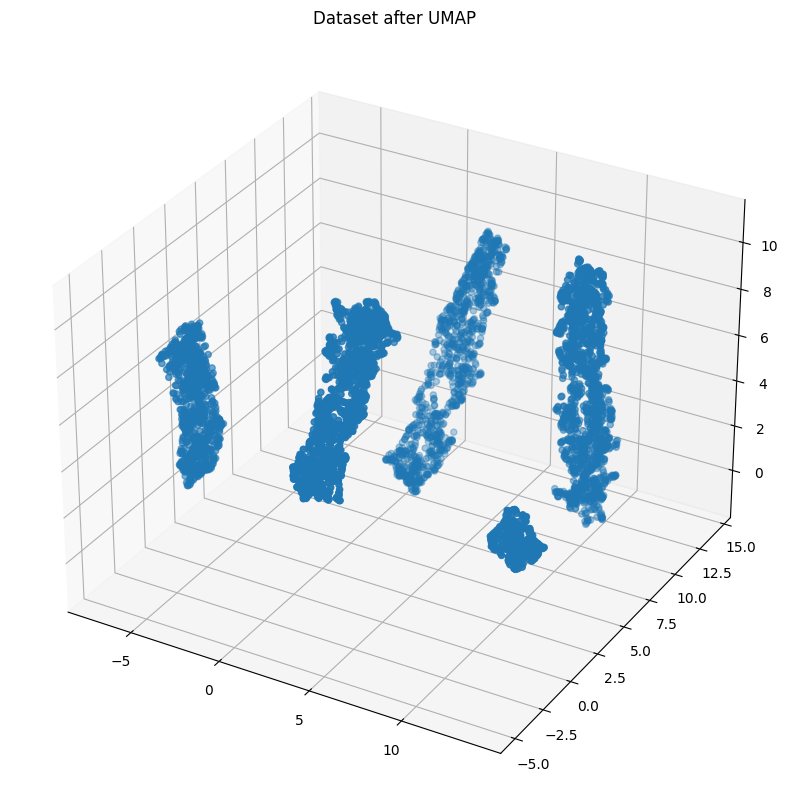

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(ReducedData['Col1'], ReducedData['Col2'], ReducedData['Col3'])
ax.set_title('Dataset after UMAP')
plt.show()

### PCA

In [1]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state=42)
ComponentValues = pca.fit_transform(df)

ReducedData = pd.DataFrame(data=ComponentValues, columns=['Col1', 'Col2', 'Col3'])

dataset_reduced_pca = ReducedData

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ReducedData['Col1'],
           ReducedData['Col2'],
           ReducedData['Col3'],
           cmap='viridis')
ax.set_title('Dataset after PCA')
plt.show()

NameError: name 'df' is not defined

### tSNE

<ipython-input-40-86c926518b77>:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(ReducedData['Col1'],


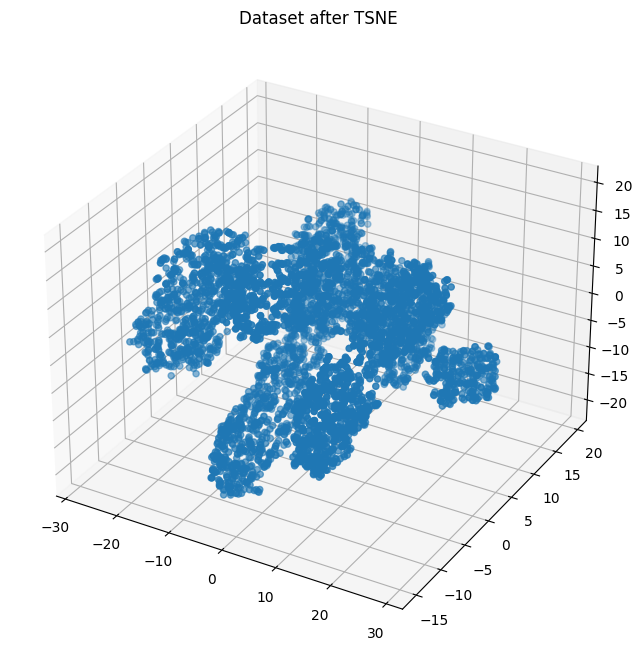

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, random_state=42)
ComponentValues = tsne.fit_transform(df)

ReducedData = pd.DataFrame(data=ComponentValues, columns=['Col1', 'Col2', 'Col3'])

dataset_reduced_tsne = ReducedData

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ReducedData['Col1'],
           ReducedData['Col2'],
           ReducedData['Col3'],
          cmap='viridis')
ax.set_title('Dataset after TSNE')
plt.show()

### Reduced Datasets (Save and Load)

Save Data

In [ ]:
# Save the decomposed datasets to Excel files
dataset_reduced_umap.to_excel('dataset_reduced_umap.xlsx', index=False)
dataset_reduced_pca.to_excel('dataset_reduced_pca.xlsx', index=False)
dataset_reduced_tsne.to_excel('dataset_reduced_tsne.xlsx', index=False)

Load Data

In [ ]:
# Read the Excel files into a DataFrame
dataset_reduced_umap = pd.read_excel('dataset_reduced_umap.xlsx')
dataset_reduced_pca = pd.read_excel('dataset_reduced_pca.xlsx')
dataset_reduced_tsne = pd.read_excel('dataset_reduced_tsne.xlsx')

## Clustering

In [ ]:
datasets = [dataset_reduced_umap, dataset_reduced_pca, dataset_reduced_tsne]
reductions = ["Umap", "PCA", "tSNE"]

### DBSCAN on all 3 datasets

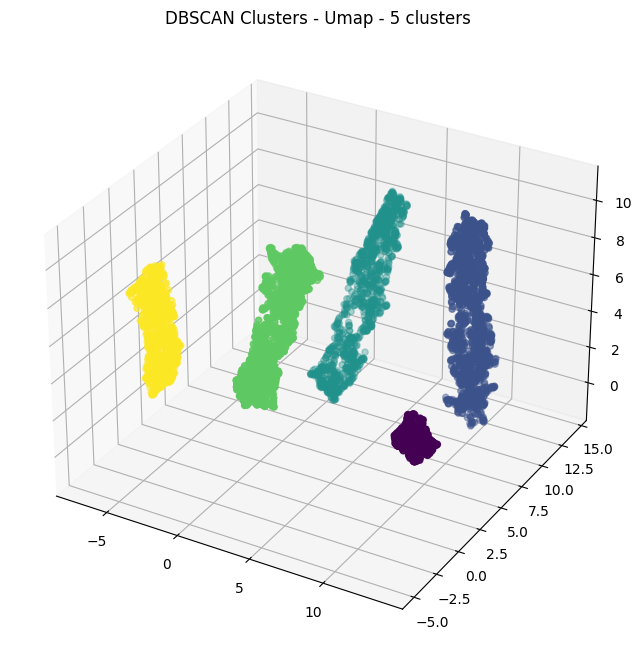

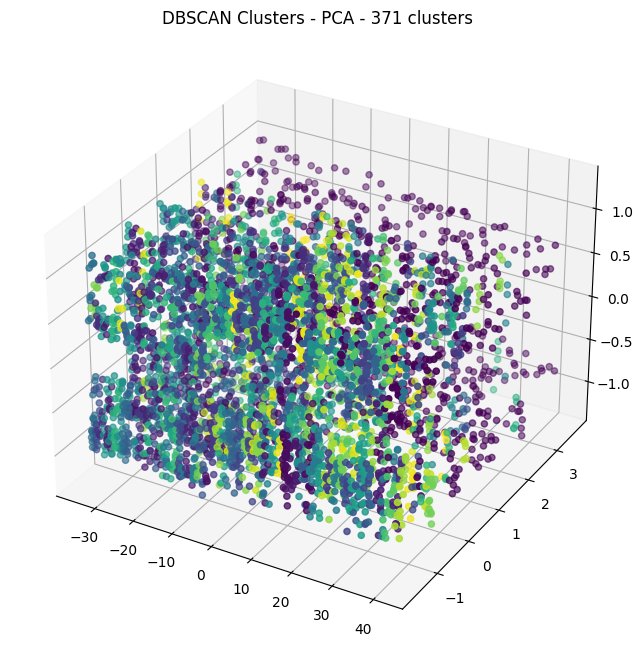

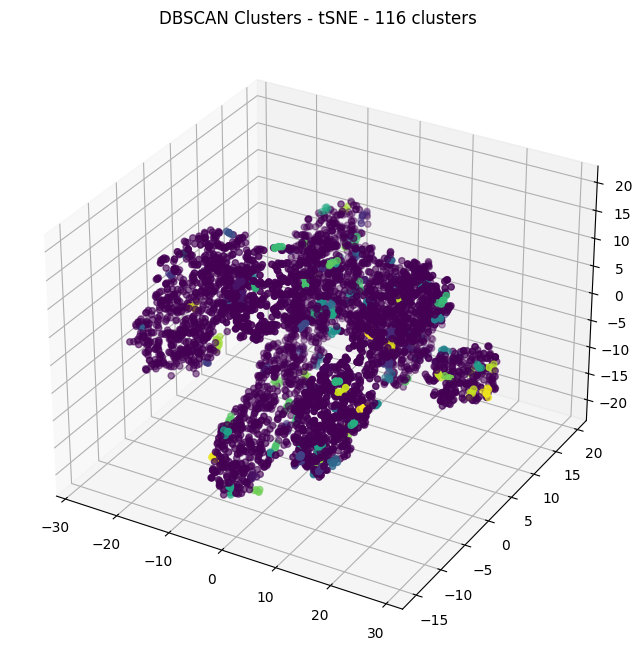

In [ ]:
eps = 0.7
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

for i in range(len(datasets)):
    clusters = dbscan.fit_predict(datasets[i])
    num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0) # excluding noise points with label -1
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(datasets[i]['Col1'], datasets[i]['Col2'], datasets[i]['Col3'], c=clusters, cmap='viridis')
    ax.set_title(f'DBSCAN Clusters - {reductions[i]} - {num_clusters} clusters')
    plt.show()

The DBSCAN Algorithm identifies 7 clusters after the UMAP decomposition, 317 after PCA and 283 after tSNE. This means that we may want to tweak the parameters of DBSCAN in the decompositions. We employ the use of the silhouette score to optimize eps and min_samples.


Optimizing parameters for Dataset 1:
Optimal Parameters for Dataset 1: eps=0.7, min_samples=5
Optimal Silhouette Score for Dataset 1: 0.5824258127093633



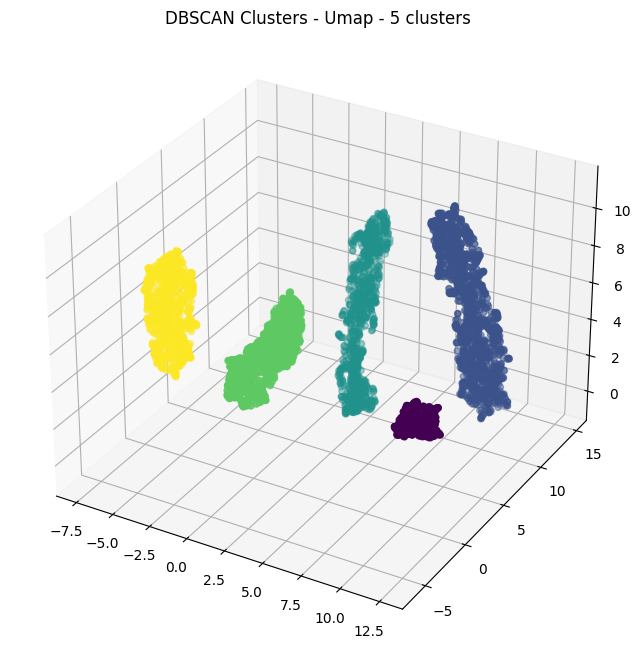


Optimizing parameters for Dataset 2:
Optimal Parameters for Dataset 2: eps=1.4999999999999998, min_samples=5
Optimal Silhouette Score for Dataset 2: 0.5018252184836102



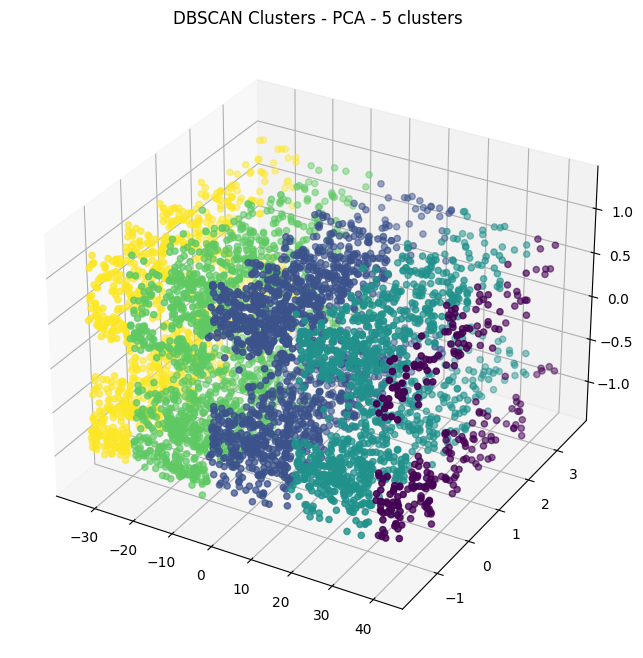


Optimizing parameters for Dataset 3:
Optimal Parameters for Dataset 3: eps=1.8999999999999997, min_samples=8
Optimal Silhouette Score for Dataset 3: 0.2982653186059506



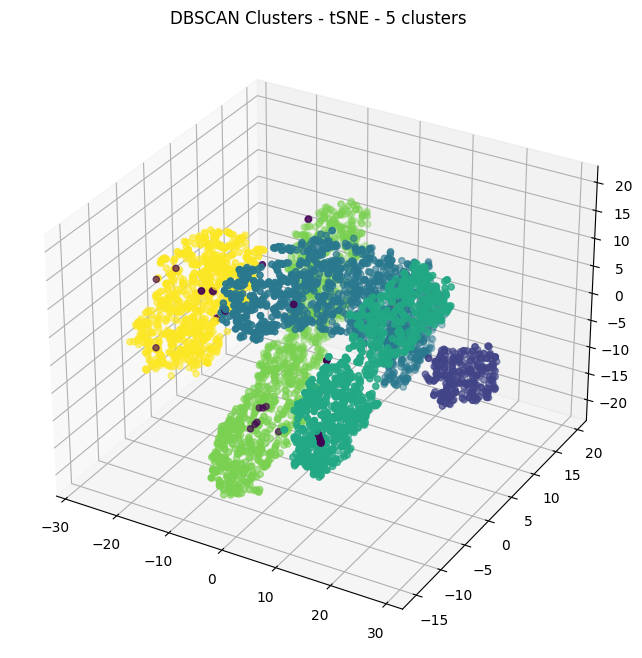

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

optimal_parameters = []

for i, data in enumerate(datasets):
    print(f"\nOptimizing parameters for Dataset {i+1}:")

    # Define a range of values for eps and min_samples
    eps_values = np.arange(0.5, 2.0, 0.1)
    min_samples_values = np.arange(5, 20, 1)

    # Initialize variables to store the optimal parameters and silhouette score
    best_eps = None
    best_min_samples = None
    best_silhouette_score = -1  # Set to a low initial value

    # Iterate over different combinations of eps and min_samples
    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            clusters = dbscan.fit_predict(data)
            try:
              silhouette_avg = silhouette_score(data, clusters)
            except ValueError:
              silhouette_avg = -1
              pass
            #print(f"eps = {eps}")
            #print(f"min_samples = {min_samples}")
            #print(f"silhouette score = {silhouette_avg}")

            # Update optimal parameters if the silhouette score is higher
            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_eps = eps
                best_min_samples = min_samples

    # Print the optimal parameters and silhouette score for the current dataset
    print(f'Optimal Parameters for Dataset {i+1}: eps={best_eps}, min_samples={best_min_samples}')
    optimal_parameters.append((best_eps, best_min_samples))
    print(f'Optimal Silhouette Score for Dataset {i+1}: {best_silhouette_score}\n')

    # Now, you can use these optimal parameters to perform DBSCAN clustering and visualization
    dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
    clusters = dbscan.fit_predict(data)
    num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0) # excluding noise points with label -1
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(datasets[i]['Col1'], datasets[i]['Col2'], datasets[i]['Col3'], c=clusters, cmap='viridis')
    ax.set_title(f'DBSCAN Clusters - {reductions[i]} - {num_clusters} clusters')
    plt.show()

From DBSCAN analysis there appear to be 5 clusters in all types of decompositions.

In [ ]:
print(optimal_parameters)

[(1.5, 5), (1.5, 5), (1.9, 8)]


### HDBSCAN on all 3 datasets

In [ ]:
import numpy as np
from hdbscan import HDBSCAN
from sklearn.metrics import silhouette_score

optimal_parameters_hdbscan = []

for i, data in enumerate(datasets):
    print(f"\nOptimizing parameters for Dataset {i+1}:")

    # Define a range of values for min_cluster_size and min_samples
    min_cluster_size_values = np.arange(5, 20, 1)
    min_samples_values = np.arange(1, 10, 1)

    # Initialize variables to store the optimal parameters and silhouette score
    best_min_cluster_size = None
    best_min_samples = None
    best_silhouette_score = -1  # Set to a low initial value

    # Iterate over different combinations of min_cluster_size and min_samples
    for min_cluster_size in min_cluster_size_values:
        for min_samples in min_samples_values:
            clusterer = HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_samples)
            clusters = clusterer.fit_predict(data)
            try:
                silhouette_avg = silhouette_score(data, clusters)
            except ValueError:
                silhouette_avg = -1
                pass

            # Update optimal parameters if the silhouette score is higher
            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_min_cluster_size = min_cluster_size
                best_min_samples = min_samples

    # Print the optimal parameters and silhouette score for the current dataset
    print(f'Optimal Parameters for Dataset {i+1}: min_cluster_size={best_min_cluster_size}, min_samples={best_min_samples}')
    optimal_parameters_hdbscan.append((best_min_cluster_size, best_min_samples))
    print(f'Optimal Silhouette Score for Dataset {i+1}: {best_silhouette_score}\n')

    # Now, you can use these optimal parameters to perform HDBSCAN clustering and visualization
    hdbscan = HDBSCAN(min_cluster_size=best_min_cluster_size, min_samples=best_min_samples)
    clusters = hdbscan.fit_predict(data)

    # Visualize the clusters as needed
    # (Note: Visualization for HDBSCAN might be different than DBSCAN, as it can handle variable density clusters)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(pca_df['PC1'],
              pca_df['PC2'],
              pca_df['PC3'],
              c=clusters, cmap='viridis')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.set_title('HDBSCAN on PCA 3D')


ModuleNotFoundError: No module named 'hdbscan'

In [ ]:
print(optimal_parameters_hdbscan)

From HDBSCAN analysis ...

### Minisom clustering on all 3 datasets

In [ ]:
# Import package
!pip install minisom
from minisom import MiniSom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.2-py3-none-any.whl size=10650 sha256=c8864c3d3377d8c910849f639ba701937b80b5510c7787dbc9fc3bced49d0ab4
  Stored in directory: /root/.cache/pip/wheels/b4/f6/8a/9daf8831901c3e3805775633404248f10663d1c80b7e5a1314
Successfully built minisom


In [ ]:
# General Parameters
input_dim = 3
num_clusters = 5

som_shape = (1, num_clusters)


# Neighborhood function names
neighborhood_functions = ['gaussian', 'bubble', 'mexican_hat', 'triangle']


In [ ]:
for i, data in enumerate(datasets):

  data_np = np.array(data)

  for func_name in neighborhood_functions:

    som = MiniSom(som_shape[0], som_shape[1], data.shape[1], sigma=0.4, learning_rate=0.3,
                neighborhood_function=func_name, random_seed=10)
    som.train_batch(data_np, 1000, verbose=True)
    # Each neuron represents a cluster
    winner_coordinates = np.array([som.winner(x) for x in data_np]).T
    # Convert bidimensional coordinates to a monodimensional index
    cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)
    # Create a 3D scatter plot
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the clusters using the first 3 dimensions of the data
    for c in np.unique(cluster_index):
        ax.scatter(data_np[cluster_index == c, 0],
                  data_np[cluster_index == c, 1],
                  data_np[cluster_index == c, 2],
                  label=f'cluster={c}', alpha=0.6)

    # Plot centroids
    for centroid in som.get_weights():
        ax.scatter(centroid[:, 0], centroid[:, 1], centroid[:, 2],
                    marker='x', s=20, linewidths=15, color='k', label='centroid')

    ax.set_xlabel('Dimension 1')
    ax.set_ylabel('Dimension 2')
    ax.set_zlabel('Dimension 3')
    ax.set_title(f'SOM on {reductions[i]} with neighborhood function {func_name}')
    plt.legend()
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

Best result: Gaussian function on UMAP decomposition.

## Interpretation of results

### Intro

Let's choose UMAP decomposition and DBSCAN clustering.

In [ ]:
excel_file_path = 'BankClients.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(excel_file_path)

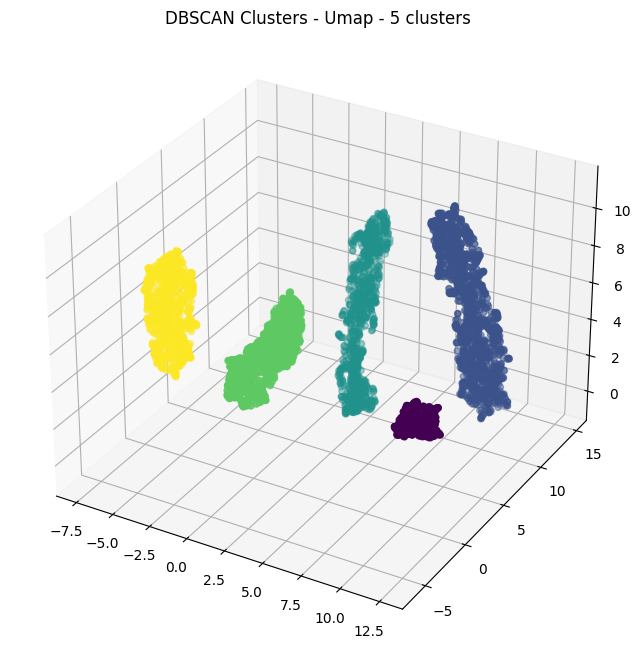

In [ ]:
eps = 1.5 #  optimal_parameters[0][0]
min_samples = 5 # optimal_parameters[0][1]

# run dbscan on the umap decomposition
i = 0

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(datasets[i])
num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0) # excluding noise points with label -1
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(datasets[i]['Col1'], datasets[i]['Col2'], datasets[i]['Col3'], c=clusters, cmap='viridis')
ax.set_title(f'DBSCAN Clusters - {reductions[i]} - {num_clusters} clusters')
plt.show()

In [ ]:
# get clusters
df['Cluster'] = clusters
df.drop(columns=['ID'],inplace=True) # drop the ID column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          5000 non-null   int64  
 1   Gender       5000 non-null   int64  
 2   Job          5000 non-null   int64  
 3   Area         5000 non-null   int64  
 4   CitySize     5000 non-null   int64  
 5   FamilySize   5000 non-null   int64  
 6   Income       5000 non-null   float64
 7   Wealth       5000 non-null   float64
 8   Debt         5000 non-null   float64
 9   FinEdu       5000 non-null   float64
 10  ESG          5000 non-null   float64
 11  Digital      5000 non-null   float64
 12  BankFriend   5000 non-null   float64
 13  LifeStyle    5000 non-null   float64
 14  Luxury       5000 non-null   float64
 15  Saving       5000 non-null   float64
 16  Investments  5000 non-null   int64  
 17  Cluster      5000 non-null   int64  
dtypes: float64(10), int64(8)
memory usage: 703.2 KB


Now we plot histograms that represent the cluster in function of the given features.

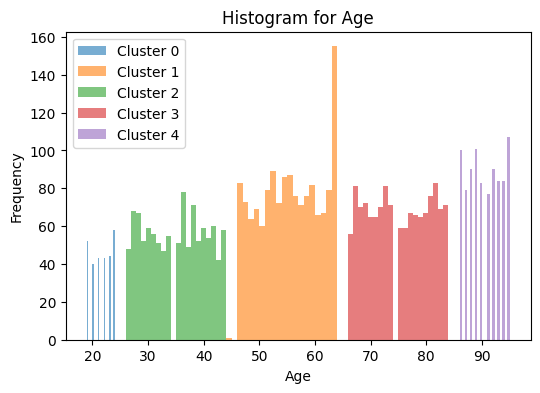

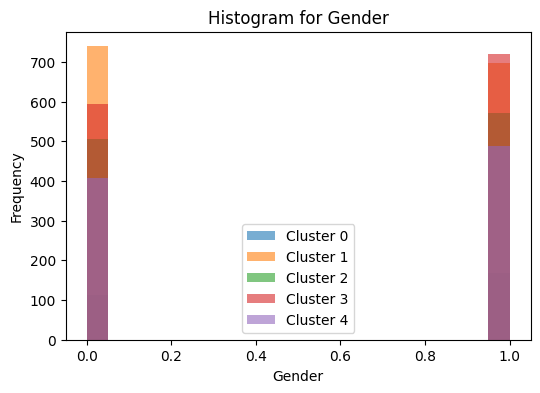

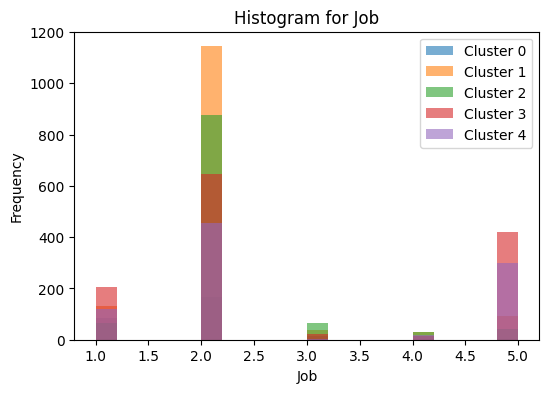

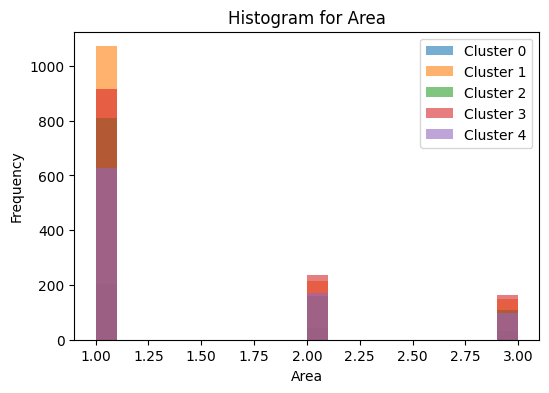

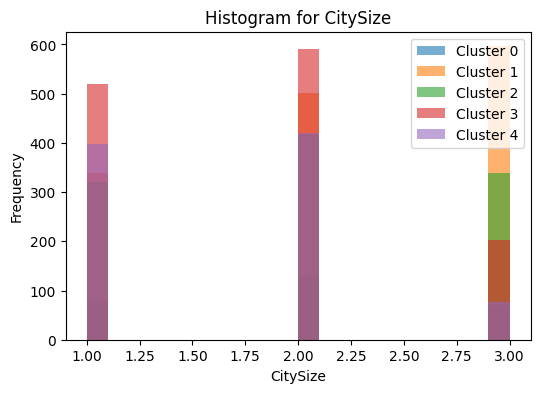

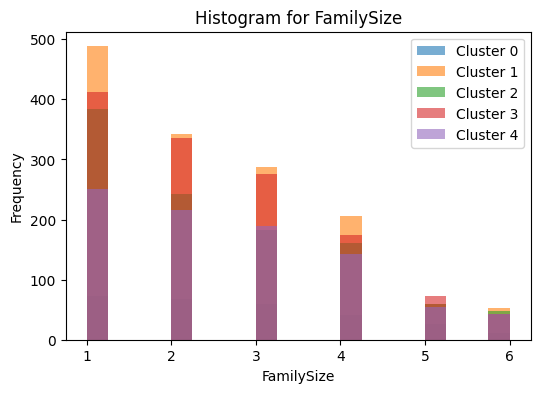

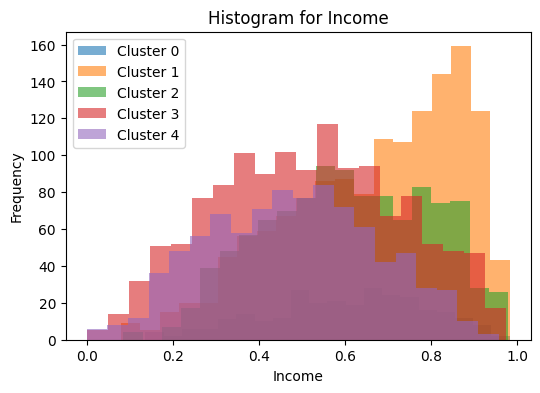

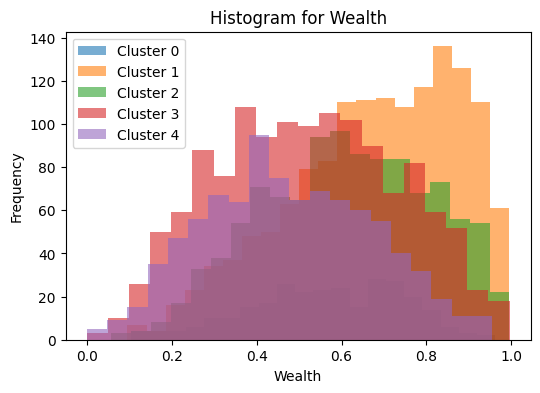

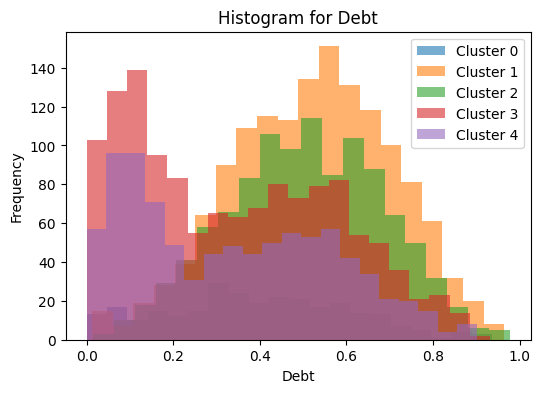

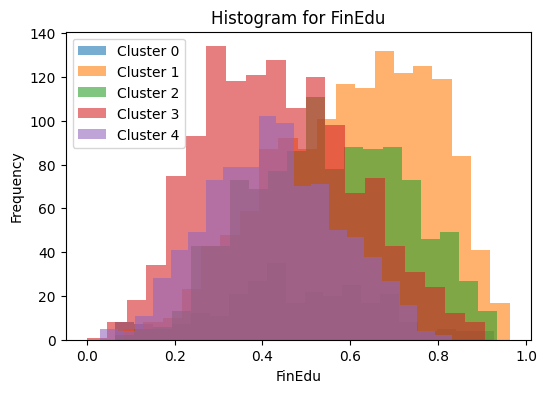

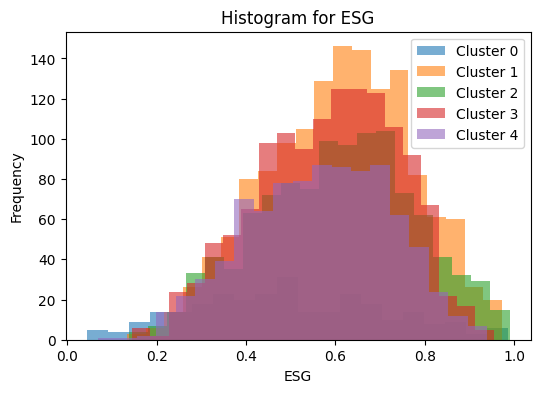

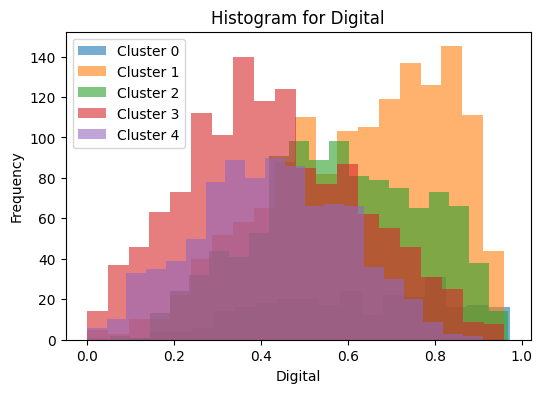

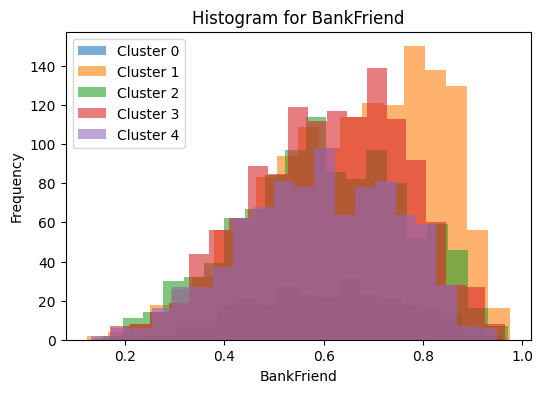

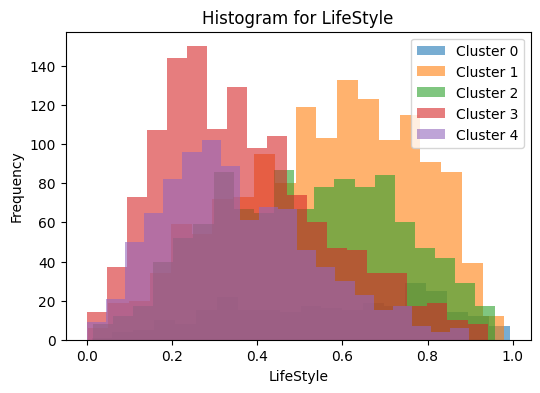

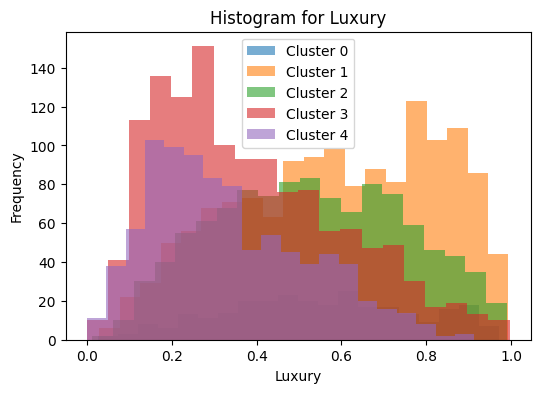

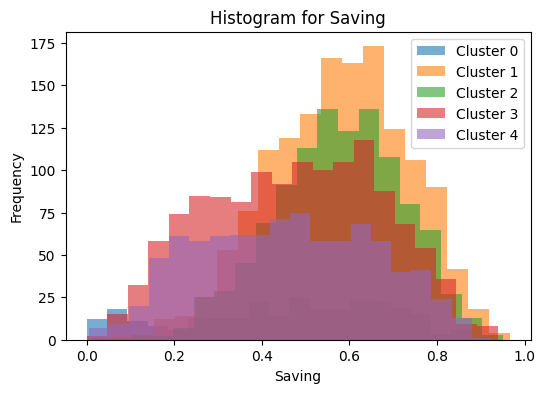

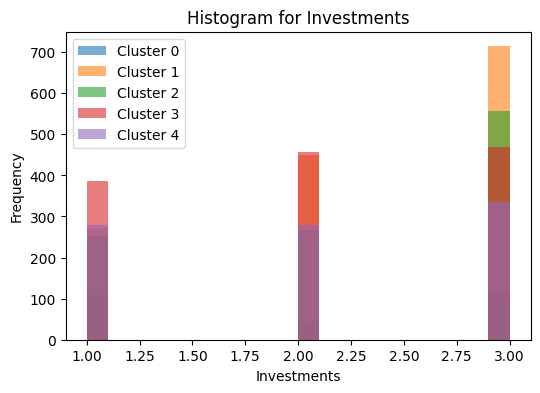

In [ ]:
# Create separate histograms for each column
for col in df.columns[:-1]:  # Exclude the 'Cluster' column
    plt.figure(figsize=(6, 4))
    for cluster, group_data in df.groupby('Cluster'):
        plt.hist(group_data[col], bins=20, alpha=0.6, label=f'Cluster {cluster}')

    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram for {col}')
    plt.legend()
    plt.show()

### MANOVA and ANOVAs

Ideally now we take the continuous variables and perform a MANOVA to see if there is actually a distinction among clusters.

In [ ]:
!pip install statsmodels seaborn

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.multivariate.manova import MANOVA

Now we do the boxplots.

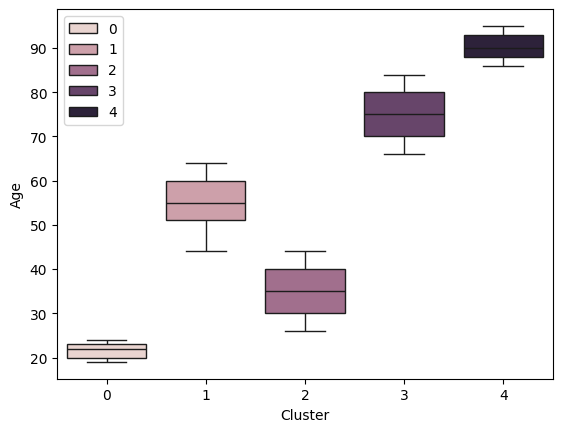

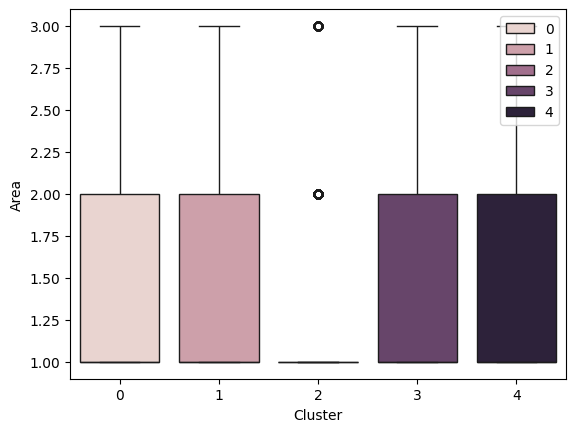

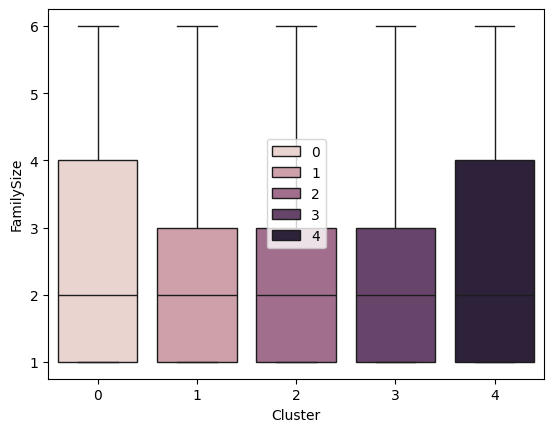

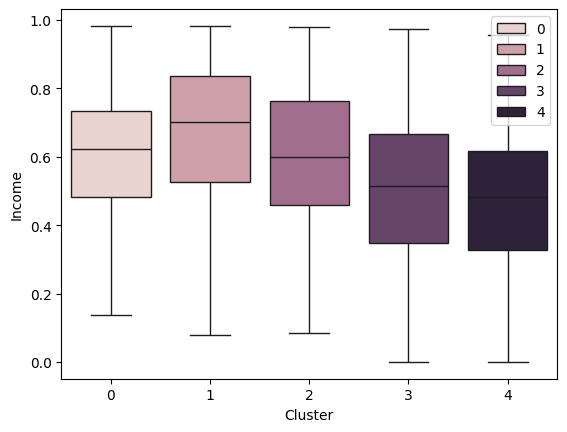

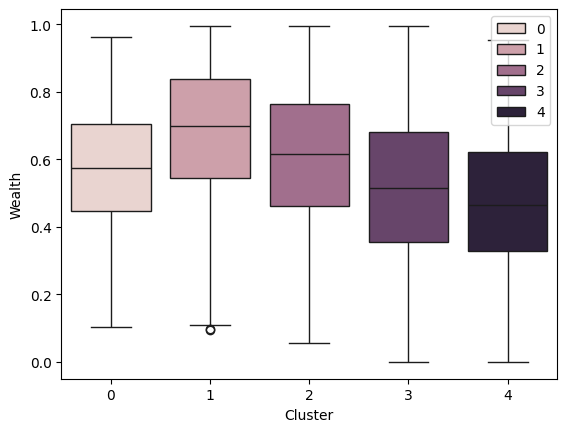

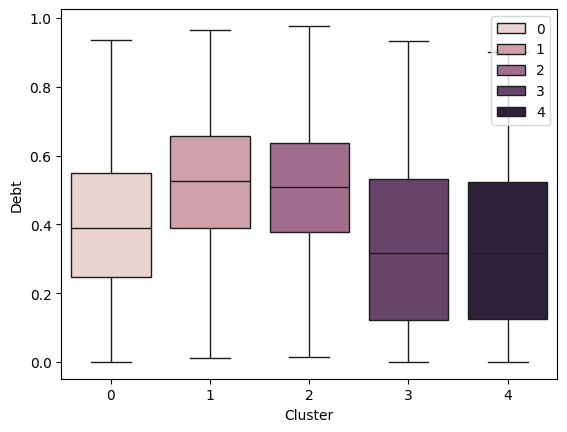

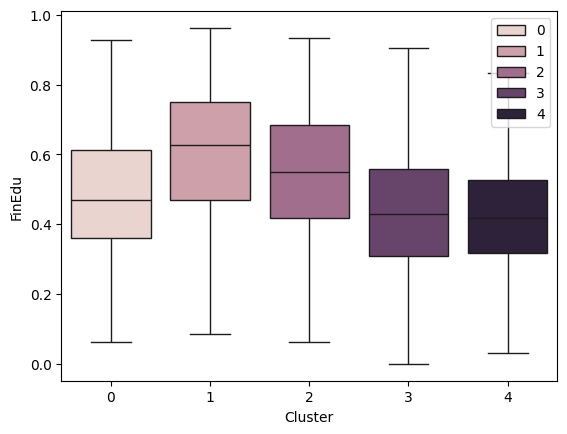

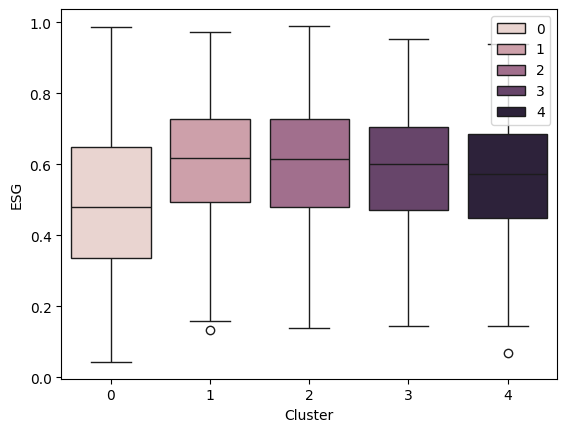

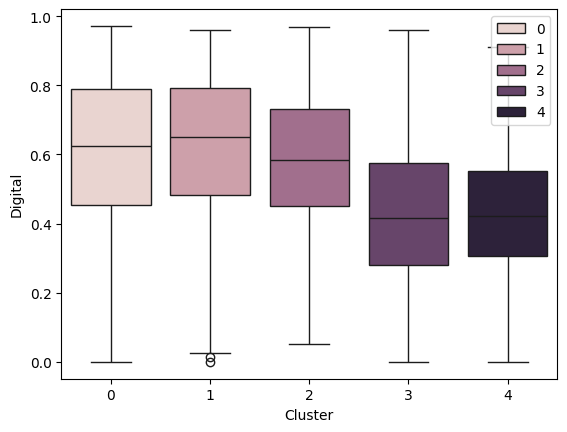

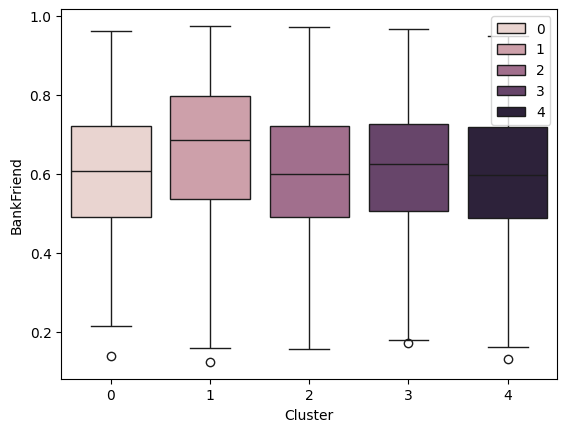

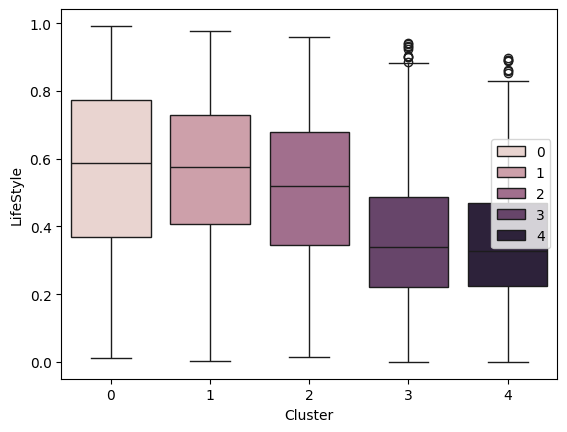

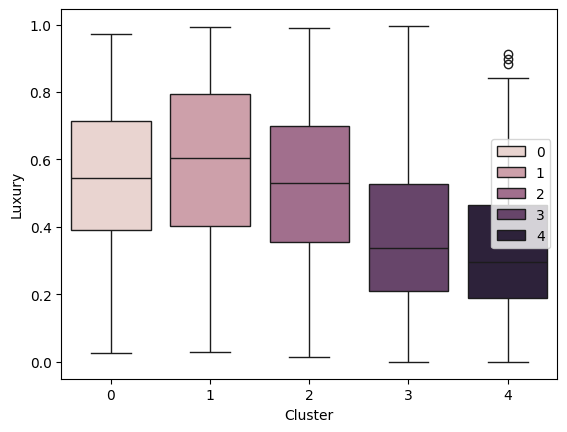

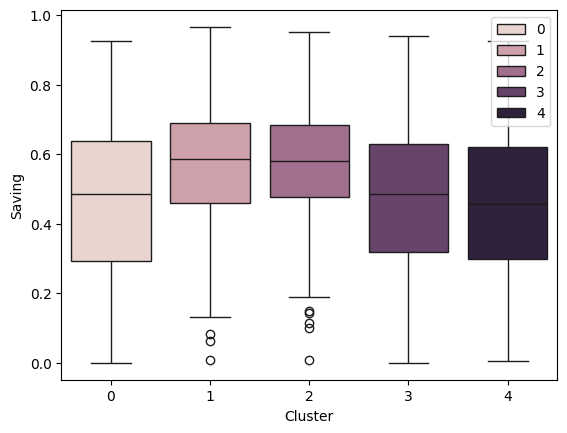

In [ ]:
grouping = df.groupby('Cluster')

summary_statistics = []
# exclude gender, job, citysize, investments

for col in df.columns[:-1]:
  if col != 'Gender' and col != 'Job' and col != 'CitySize' and col != 'Investments':
    summary_statistics.append((grouping[col].agg(["count", "mean", "std"])))
    # Visualize the data (boxplots)
    fig, axs = plt.subplots(ncols=1)
    sns.boxplot(data=df, x="Cluster", y=col, hue=df["Cluster"].tolist(), ax=axs)
    #sns.boxplot(data=df, x="Cluster", y="canopy_vol", hue=df["cluster"].tolist(), ax=axs[1])
    plt.show()

In [ ]:
df.columns

Index(['Age', 'Gender', 'Job', 'Area', 'CitySize', 'FamilySize', 'Income',
       'Wealth', 'Debt', 'FinEdu', 'ESG', 'Digital', 'BankFriend', 'LifeStyle',
       'Luxury', 'Saving', 'Investments', 'Cluster'],
      dtype='object')

In [ ]:
from scipy.stats import shapiro

# Assuming 'Cluster' is the grouping variable in your DataFrame
groups = df['Cluster'].unique()

# Check normality for each group
shapiro_results = {}

for group in groups:
    # Extract data for the current group
    data = df[df['Cluster'] == group].drop(['Cluster'], axis=1)

    # Perform Shapiro-Wilk test
    _, p_value = shapiro(data)
    shapiro_results[group] = p_value

# Print Shapiro-Wilk test results
print("\nShapiro-Wilk test results for each group:")
for group, p_value in shapiro_results.items():
    print(f"Group {group}: p-value = {p_value}")

# Note: If p-values are greater than the significance level (e.g., 0.05), the null hypothesis of normality is not rejected.
# If p-values are small, you may have evidence to reject the null hypothesis.



Shapiro-Wilk test results for each group:
Group 0: p-value = 0.0
Group 1: p-value = 0.0
Group 2: p-value = 0.0
Group 3: p-value = 0.0
Group 4: p-value = 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
from scipy.stats import multivariate_normal
import numpy as np
from scipy.stats import chi2

def check_multivariate_normality(data, significance_level=0.05):
    """
    Check multivariate normality using Mardia's test.

    Parameters:
    - data: DataFrame with variables in columns and observations in rows.
    - significance_level: The significance level for the Mardia's test.

    Returns:
    - p_values: Dictionary with p-values for each group.
    """

    groups = data['Cluster'].unique()
    p_values = {}

    for group in groups:
        group_data = data[data['Cluster'] == group].drop(['Cluster'], axis=1)

        # Calculate skewness and kurtosis
        skewness = group_data.skew().values
        kurtosis = group_data.kurtosis().values

        # Calculate Mardia's multivariate skewness and kurtosis
        n = len(group_data)
        S_inv = np.linalg.inv(group_data.cov())  # Inverse of the covariance matrix
        mardia_skewness = (n * skewness @ S_inv @ skewness.T) / 6
        mardia_kurtosis = (n * kurtosis @ S_inv @ kurtosis.T) / 24

        # Calculate the Mardia's test statistic
        mardia_test_statistic = n * (mardia_skewness**2 + mardia_kurtosis**2) / 4

        # Calculate the p-value using chi-squared distribution
        df = group_data.shape[1]  # Degrees of freedom
        p_value = 1 - chi2.cdf(mardia_test_statistic, df)

        p_values[group] = p_value

    return p_values

# Use the function to check multivariate normality
p_values = check_multivariate_normality(df, significance_level=0.05)

# Print the results
print("\nMardia's test results for each group:")
for group, p_value in p_values.items():
    print(f"Group {group}: p-value = {p_value}")

# Note: If p-values are greater than the significance level, the null hypothesis of multivariate normality is not rejected.
# If p-values are small, you may consider alternative methods or transformations.



Mardia's test results for each group:
Group 0: p-value = 0.0
Group 1: p-value = 0.0
Group 2: p-value = 0.0
Group 3: p-value = 0.0
Group 4: p-value = 0.0


In [ ]:
# Perform one-way MANOVA
# exclude gender, job, citysize, investments

formula = "Age + Area + FamilySize + Income + Wealth + Debt + FinEdu + ESG + Digital + BankFriend + LifeStyle + Luxury + Saving ~ Cluster"
manova_fit = MANOVA.from_formula(formula, data=df)
print(manova_fit.mv_test())

# Check multivariate normality (MVN test)
# You can use the scipy.stats.multivariate_normal function
# Example: scipy.stats.multivariate_normal.pdf(x, mean, cov)
# where x is your data, mean is the mean vector, and cov is the covariance matrix
# You can compare the distribution of your data to a multivariate normal distribution

# Note: MANOVA assumes multivariate normality, but it's essential to verify it.
# If your data violates this assumption, consider using alternative methods.

# Replace the placeholders with your actual data and variables


                    Multivariate linear model
                                                                  
------------------------------------------------------------------
       Intercept         Value   Num DF   Den DF   F Value  Pr > F
------------------------------------------------------------------
          Wilks' lambda  0.0775 13.0000 4986.0000 4564.5674 0.0000
         Pillai's trace  0.9225 13.0000 4986.0000 4564.5674 0.0000
 Hotelling-Lawley trace 11.9012 13.0000 4986.0000 4564.5674 0.0000
    Roy's greatest root 11.9012 13.0000 4986.0000 4564.5674 0.0000
------------------------------------------------------------------
                                                                  
------------------------------------------------------------------
          Cluster         Value   Num DF   Den DF  F Value  Pr > F
------------------------------------------------------------------
            Wilks' lambda 0.3509 13.0000 4986.0000 709.5092 0.0000
           Pilla

In [ ]:
manova_fit

In [ ]:
from statsmodels.multivariate.manova import MANOVA
from scipy.stats import shapiro

# Perform one-way MANOVA
# exclude gender, job, citysize, investments

formula = "Age + Area + FamilySize + Income + Wealth + Debt + FinEdu + ESG + Digital + BankFriend + LifeStyle + Luxury + Saving ~ Cluster"
manova_fit = MANOVA.from_formula(formula, data=df)
manova_results = manova_fit.mv_test()
print(manova_results)

# Extract residuals from each univariate ANOVA result
residuals = [anova_result for anova_result in manova_fit.mv_test().results]

# Check multivariate normality of residuals (MVN test)
shapiro_results = {}

for cluster, data in zip(manova_fit.groups, residuals):
    _, p_value = shapiro(data)
    shapiro_results[cluster] = p_value

# Print Shapiro-Wilk test results
print("\nShapiro-Wilk test results for each cluster:")
for cluster, p_value in shapiro_results.items():
    print(f"Cluster {cluster}: p-value = {p_value}")

# Note: MANOVA assumes multivariate normality, so it's crucial to check the residuals.
# If the residuals are not normally distributed, consider alternative methods.


                    Multivariate linear model
                                                                  
------------------------------------------------------------------
       Intercept         Value   Num DF   Den DF   F Value  Pr > F
------------------------------------------------------------------
          Wilks' lambda  0.0775 13.0000 4986.0000 4564.5674 0.0000
         Pillai's trace  0.9225 13.0000 4986.0000 4564.5674 0.0000
 Hotelling-Lawley trace 11.9012 13.0000 4986.0000 4564.5674 0.0000
    Roy's greatest root 11.9012 13.0000 4986.0000 4564.5674 0.0000
------------------------------------------------------------------
                                                                  
------------------------------------------------------------------
          Cluster         Value   Num DF   Den DF  F Value  Pr > F
------------------------------------------------------------------
            Wilks' lambda 0.3509 13.0000 4986.0000 709.5092 0.0000
           Pilla

AttributeError: 'MANOVA' object has no attribute 'groups'

In [ ]:
manova_fit.mv_test().results

{'Intercept': {'stat':                             Value Num DF  Den DF      F Value Pr > F
  Wilks' lambda            0.077512     13  4986.0  4564.567397    0.0
  Pillai's trace           0.922488   13.0  4986.0  4564.567397    0.0
  Hotelling-Lawley trace  11.901199     13  4986.0  4564.567397    0.0
  Roy's greatest root     11.901199     13    4986  4564.567397    0.0,
  'contrast_L': array([[1., 0.]]),
  'transform_M': array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
      

So the clustering is indeed relevant. Let's see which variables contribute the most by running ANOVAs on each feature and compare it to the clusters.

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
# Assuming you have a DataFrame 'df' with your data
dependent_vars = df.columns[:-1]
independent_var = 'Cluster'

# Loop through dependent variables and perform ANOVA for each
for var in dependent_vars:
    formula = f'{var} ~ {independent_var}'
    model = ols(formula, data=df).fit()

    # Print ANOVA table
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(f"ANOVA for {var}:\n{anova_table}\n")

In [ ]:
k = 0.05

for var in dependent_vars:
    formula = f'{var} ~ {independent_var}'
    model = ols(formula, data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    p_value = anova_table['PR(>F)'][0]
    if p_value < k:
      print(f"[YES] {var} is significant at level {int(k*100)}% with p-value {p_value}")
    else:
      print(f"[NO]  {var} is not significant at level {int(k*100)}% with p-value {p_value}")


[YES] Age is significant at level 5% with p-value 0.0
[NO]  Gender is not significant at level 5% with p-value 0.06648399353647698
[YES] Job is significant at level 5% with p-value 4.718475399645132e-88
[YES] Area is significant at level 5% with p-value 0.016625729960258493
[YES] CitySize is significant at level 5% with p-value 1.389178999864198e-68
[NO]  FamilySize is not significant at level 5% with p-value 0.12795901144225647
[YES] Income is significant at level 5% with p-value 3.2854198812394985e-116
[YES] Wealth is significant at level 5% with p-value 1.441248013933359e-109
[YES] Debt is significant at level 5% with p-value 5.764262889787794e-101
[YES] FinEdu is significant at level 5% with p-value 4.167263028308141e-127
[NO]  ESG is not significant at level 5% with p-value 0.10465251221435476
[YES] Digital is significant at level 5% with p-value 1.2689604966408653e-184
[YES] BankFriend is significant at level 5% with p-value 1.0487167370807377e-14
[YES] LifeStyle is significant a

In [ ]:
k = 0.01

for var in dependent_vars:
    formula = f'{var} ~ {independent_var}'
    model = ols(formula, data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    p_value = anova_table['PR(>F)'][0]
    if p_value < k:
      print(f"[YES] {var} is significant at level {int(k*100)}% with p-value {p_value}")
    else:
      print(f"[NO]  {var} is not significant at level {int(k*100)}% with p-value {p_value}")


[YES] Age is significant at level 1% with p-value 0.0
[NO]  Gender is not significant at level 1% with p-value 0.06648399353647698
[YES] Job is significant at level 1% with p-value 4.718475399645132e-88
[NO]  Area is not significant at level 1% with p-value 0.016625729960258493
[YES] CitySize is significant at level 1% with p-value 1.389178999864198e-68
[NO]  FamilySize is not significant at level 1% with p-value 0.12795901144225647
[YES] Income is significant at level 1% with p-value 3.2854198812394985e-116
[YES] Wealth is significant at level 1% with p-value 1.441248013933359e-109
[YES] Debt is significant at level 1% with p-value 5.764262889787794e-101
[YES] FinEdu is significant at level 1% with p-value 4.167263028308141e-127
[NO]  ESG is not significant at level 1% with p-value 0.10465251221435476
[YES] Digital is significant at level 1% with p-value 1.2689604966408653e-184
[YES] BankFriend is significant at level 1% with p-value 1.0487167370807377e-14
[YES] LifeStyle is significa

By this analysis we conclude that the only variables that are not relevant to the clustering are: Gender, FamilySize and ESG at level 5%.

### Interpretation of Clusters

After we have concluded that our clustering procedure is robust, we can now proceed to interpret the clusters in a domain-specific way.

finish this in a nice way.

In [ ]:
import pandas as pd

# Assuming 'Cluster' is a column in your DataFrame
grouping = df.groupby('Cluster')

summary_statistics = []

# Exclude specific columns
exclude_columns = ['Gender', 'Job', 'CitySize', 'Investments']

categorical_cols = ['Area', 'BankFriend', 'LifeStyle', 'Luxury']

for col in df.columns:
    if col not in exclude_columns and col not in categorical_cols:
        # Compute summary statistics for each column by cluster
        summary_stats = grouping[col].agg(["count", "mean", "std"])
        # Append results to the summary_statistics list
        summary_statistics.append(summary_stats)
    else:
        # Compute summary statistics for each column by cluster
        summary_stats = grouping[col].agg(["count", "median"])
        # Append results to the summary_statistics list
        summary_statistics.append(summary_stats)

# Print the summary statistics
for idx, col in enumerate(df.columns[:-1]):
    if col not in exclude_columns:
        print(f"Summary statistics for {col} by cluster:")
        print(summary_statistics[idx])
        print("\n")


Summary statistics for Age by cluster:
         count       mean       std
Cluster                            
0          280  21.575000  1.792482
1         1435  55.052962  5.468177
2         1077  34.922006  5.449280
3         1313  75.085301  5.523539
4          895  90.516201  2.943448


Summary statistics for Area by cluster:
         count  median
Cluster               
0          280     1.0
1         1435     1.0
2         1077     1.0
3         1313     1.0
4          895     1.0


Summary statistics for FamilySize by cluster:
         count      mean       std
Cluster                           
0          280  2.696429  1.450740
1         1435  2.418118  1.379044
2         1077  2.454968  1.457918
3         1313  2.457730  1.364261
4          895  2.621229  1.428613


Summary statistics for Income by cluster:
         count      mean       std
Cluster                           
0          280  0.601753  0.183811
1         1435  0.667698  0.200385
2         1077  0.605442  0.1